# insurance data model
Gradient Descent is an optimization algorithm commonly used in machine learning to minimize the loss function during the training of a model. The goal of Gradient Descent is to find the optimal parameters (weights and biases) for the model that minimize the loss function.

In the context of insurance data, Gradient Descent can be used to train a model (such as a logistic regression model or a neural network) to predict whether a person will buy insurance based on features like age and affordability.

In [2]:
import numpy as mp
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Importing insurance data
The insurance_data dataset contains information about individuals and their insurance policies. The dataset includes the following columns:

* **age:** The age of the individual.
* **affordibility:** The affordibility of the individual.
* **bought_insurance:** The bought_insurance of the individual.

The dataset can be used to train a machine learning model to predict the charges of an individual based on their other features.


In [4]:
df= pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


 This function splits the dataset into training and test sets

In [5]:
#train and test split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']] ,df.bought_insurance ,test_size=0.2,  random_state=25)


In [6]:
len(X_train)

22

# Scalling
scalling age between o and 1

In [7]:
x_train_Scalled=X_train.copy()
x_train_Scalled['age']=x_train_Scalled['age']/100
x_test_Scalled=X_test.copy()
x_test_Scalled['age']=x_test_Scalled['age']/100



In [8]:
x_train_Scalled.head()

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1


# Keras model
we are defining a neural network model using the Keras library. The model is a simple network with a single dense layer with a sigmoid activation function, designed to predict insurance purchase based on two features. The weight (`kernel_initializer`) and bias (`bias_initializer`) initializations are set to 'ones' and 'zeros', respectively.

Next, we compile the model using the 'adam' optimizer and 'binary_crossentropy' loss function for a binary classification problem. We are interested in the accuracy metric during training.

Finally, we fit the model to the scaled training data (`x_train_Scalled` and `y_train`) for 5000 epochs to allow the model to learn the relationship between the features and the target variable.

In [9]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid', kernel_initializer='ones',bias_initializer='zeros')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_Scalled,y_train,epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2502/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2503/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2504/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2505/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2506/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2507/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5319 - accuracy: 0.7273
Epoch 2508/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5319 - accuracy: 0.7273
Epoch 2509/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5318 - accuracy: 0.7273
Epoch 2510/5000
1/1 [==============================] - 

In [10]:
model.evaluate(x_test_Scalled,y_test)

1/1 [==============================] - 0s 105ms/step - loss: 0.3550 - accuracy: 1.0000


[0.3549776077270508, 1.0]

# Prediction of the model
value greater then 0.5 show that person will buy the insurance and vice versa.

In [11]:
model.predict(x_test_Scalled)

1/1 [==============================] - 0s 52ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.8294983 ]], dtype=float32)

In [12]:
x_test_Scalled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [13]:
model.get_weights()

[array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32)]

1/1 [==============================] - 0s 15ms/step


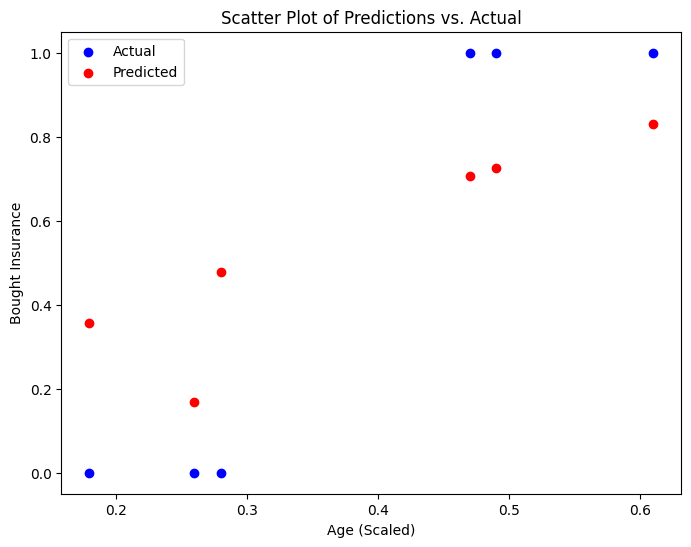

In [14]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and made predictions
predictions = model.predict(x_test_Scalled)

plt.figure(figsize=(8, 6))
plt.scatter(x_test_Scalled['age'], y_test, color='blue', label='Actual')
plt.scatter(x_test_Scalled['age'], predictions, color='red', label='Predicted')
plt.xlabel('Age (Scaled)')
plt.ylabel('Bought Insurance')
plt.title('Scatter Plot of Predictions vs. Actual')
plt.legend()
plt.show()
